In [2]:
import nanoscope
from PIL import Image
from astropy import units as u
import matplotlib.pyplot as plt
import sys
import pandas as pd
from pandas import np
from toolz.curried.operator import *
from toolz.curried import *
from multipledispatch import dispatch
from scipy import ndimage
from sklearn import linear_model
from imfractal import MFS
from pathlib import Path

%matplotlib notebook

In [3]:
globby = Path("/Users/Imperssonator/CC/DeepAFM/Data")
tif_glob=list(globby.glob('**/*.tif'))

In [6]:
def imfrac_plot(impath):
    
    mfs=MFS()
    mfs.setDef(6,26,5,ind=6)
    im=Image.open(impath)
    imlist=list(im.getdata())
    
    if type(imlist[0])==tuple:
        imarray=np.array(im.getdata())
        imarray.resize(im.height,im.width,4)
        imarray=imarray[:,:,0]
    else:
        imarray=np.array(im.getdata())
        imarray.resize(im.height,im.width)
    
    fdvec=mfs.getFDs(impath)
    
    %matplotlib inline
    figure,axis=plt.subplots(nrows=1,ncols=2)
    axis[0].imshow(imarray,cmap='gray')
#     axis[1].imshow(im_density,cmap='magma')
    axis[1].plot(np.linspace(1,5,26),fdvec)

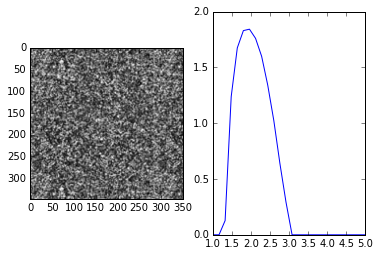

In [7]:
imfrac_plot('carpet.png')

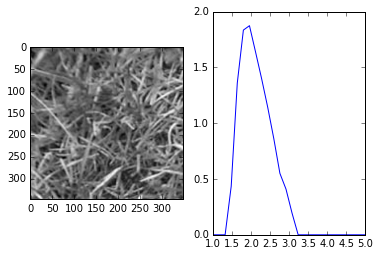

In [8]:
imfrac_plot('grass.png')

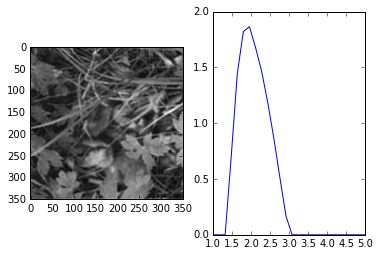

In [9]:
imfrac_plot('leaf.png')

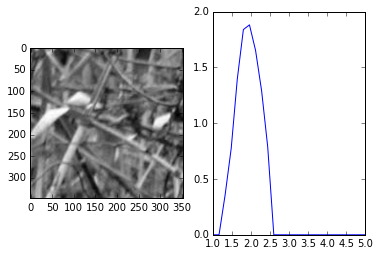

In [10]:
imfrac_plot('tree.png')

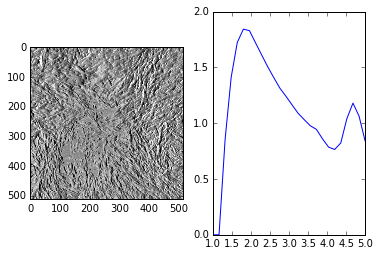

In [11]:
imfrac_plot(tif_glob[40])

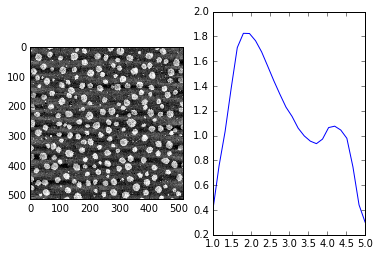

In [12]:
imfrac_plot(tif_glob[2000])

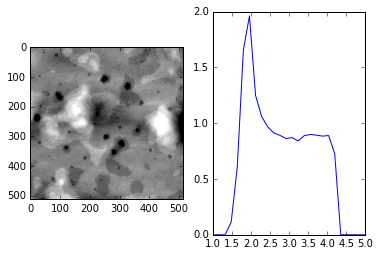

In [14]:
imfrac_plot(tif_glob[543])

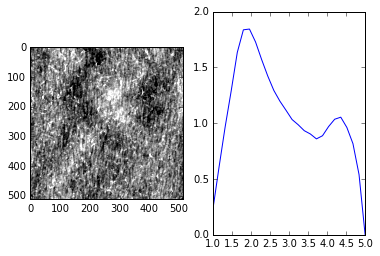

In [15]:
imfrac_plot(tif_glob[48])

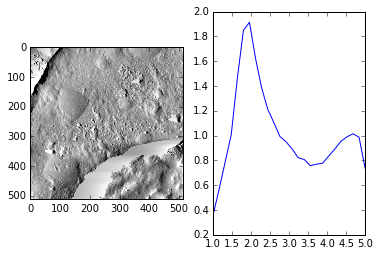

In [16]:
imfrac_plot(tif_glob[4345])

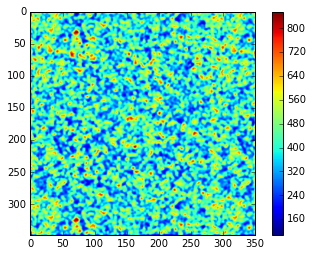

In [11]:
from scipy import signal
im=Image.open('carpet.png')
imarray=np.array(im.getdata())
imarray.resize(im.height,im.width,4)
imarray=imarray[:,:,0]
k=1
bw = signal.convolve2d(imarray, mfs.gauss_kern(1),mode="same")*((k+1)**2)
plt.imshow(bw)
plt.colorbar()

In [67]:
%matplotlib inline
carpet_list=[x[0] for x in list(carpet.getdata())]
carpet_list

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255

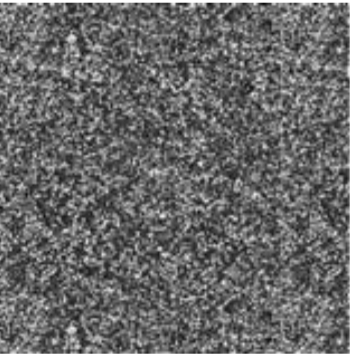

In [61]:
Image.open('carpet.png')

In [25]:
mfs=MFS()
mfs.setDef(1,20,5)
fdvec=mfs.getFDs(tif_glob[0])

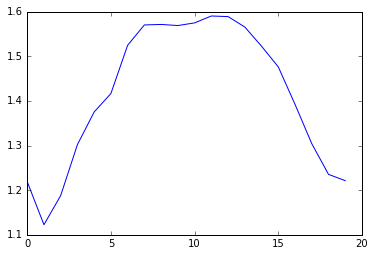

In [26]:
%matplotlib inline
plt.plot(fdvec)

In [2]:
@dispatch(int)
def plucker(a):
    return a * 10

@dispatch(str)
def plucker(a):
    return a.upper()

from nanoscope.parameter import CiaoValue
@dispatch(CiaoValue)
def plucker(a):
    return a.parameter

from astropy.units import Quantity
@dispatch(Quantity)
def plucker(a):
    raise Exception(a)
    return str(a)

In [6]:
def try_scope_read(the_path):
    try: 
        return nanoscope.read(str(the_path))
    except:
        print(the_path)
        return

In [7]:
test = pipe({
        str(f): try_scope_read(f)
        for f in take(10, globby.glob("**/*.*"))
        if all(map(str.isdigit, f.name[-3:]))
    }, valfilter(lambda x: x is not None),
)

In [9]:
DF = \
pd.concat(
    pipe(
        test,
        valmap(
            compose(
                pd.DataFrame,
                attrgetter('config')
            )
        )
    )
)#.T.stack(0).unstack(0).swaplevel(0, 1, axis=1)

In [25]:
nano=test['/Users/Imperssonator/CC/DeepAFM/Data/capture/Anna/PEDOT_LiBTI.001']

In [30]:
phase=nano.images['Phase']

In [35]:
phase.flatten()

In [37]:
phase.data

array([[ -117.,  -601.,   163., ...,   772.,   676.,  -430.],
       [ -268.,  -613.,  -332., ...,  1090.,   350.,   891.],
       [ -512.,  -664.,   595., ...,  1051.,  1046.,  1234.],
       ..., 
       [  190.,  1393.,  1175., ...,  -689.,  -691.,  -691.],
       [  566.,   131.,   844., ...,  -679.,  -674.,  -668.],
       [ 1340.,  -198.,   338., ...,  -760.,  -760.,  -758.]])

In [13]:
DF.columns.tolist()

['ACBiasAmpl',
 'AFM Current Sensitivity',
 'AFMFbIgain',
 'AFMFbPgain',
 'AFMSetDeflection',
 'AFMSetFastScanAnalog',
 'AFMSetFastScanDigital',
 'Adaptive Minimal Scan Rate',
 'Adaptive Minimal Scan Size',
 'Adaptive ScanSizeExpRatio',
 'Adaptive X DC Gain',
 'Adaptive XY Feedback Scanner',
 'Adaptive Y DC Gain',
 'Adaptive x CutOffFreq',
 'Adaptive x Feedback BW',
 'Adaptive x PlantGain',
 'Adaptive x RefPolarity',
 'Adaptive x SensorNoise',
 'Adaptive y CutOffFreq',
 'Adaptive y Feedback BW',
 'Adaptive y PlantGain',
 'Adaptive y RefPolarity',
 'Adaptive y SensorNoise',
 'All Pass Filter',
 'Allow rotation',
 'Amplitude X',
 'Amplitude Y',
 'AmplitudeLimit1',
 'AmplitudeLimit1LockIn1',
 'AmplitudeLimit1LockIn1and2',
 'AmplitudeLimit1LockIn2',
 'Analog2',
 'Analog2 High Voltage',
 'Analog22 High Voltage',
 'Analog3',
 'Analog4',
 'Aspect Ratio',
 'Auto Adjust Rounding',
 'Auto X Sep',
 'Auto Y Sep',
 'Auto number',
 'Auto pattern',
 'AvTipState',
 'BaselineAvgPtsSoftHarmoniX',
 'Bias

In [11]:
data = DF['Phase']['raw_data'][0]

KeyError: 'Phase'

In [67]:
DATA = lambda data: pipe(
    data/10000,
    partial(np.fft.fftn, s=np.array([512, 512])*2),
    lambda x: x * x.conj(),
    np.fft.ifftn, np.real
)

In [ ]:
def corr

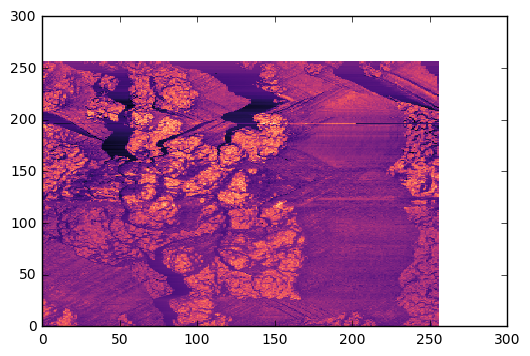

In [38]:
%matplotlib inline
plt.magma()
plt.pcolor(phase.data)

In [42]:
import MFS

ImportError: No module named 'MFS'

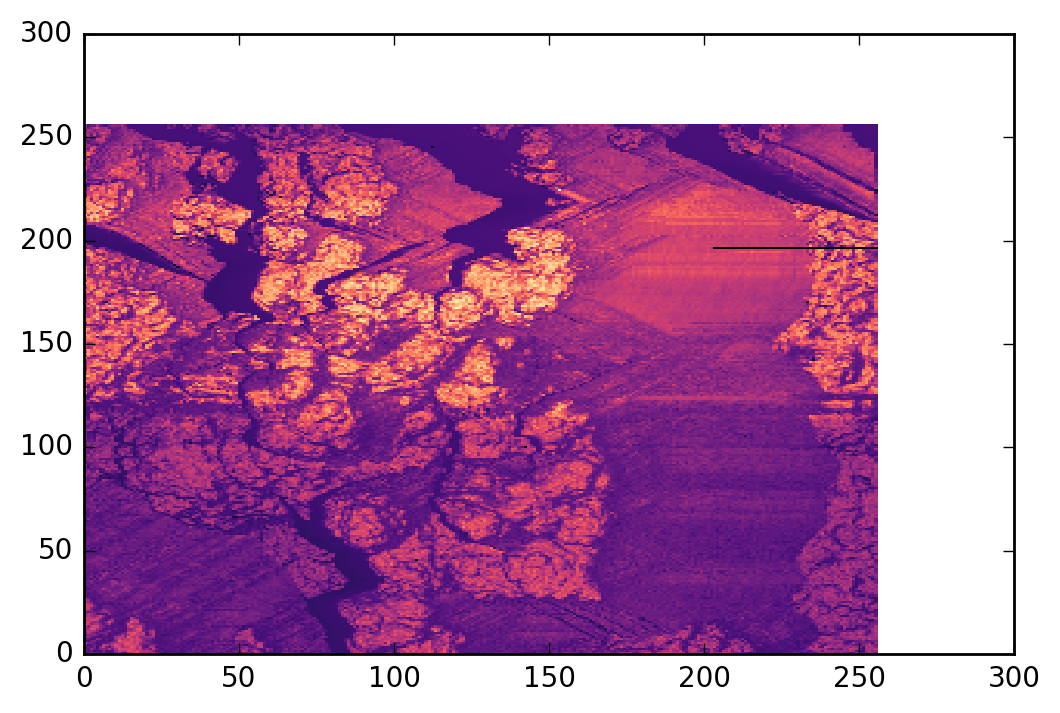

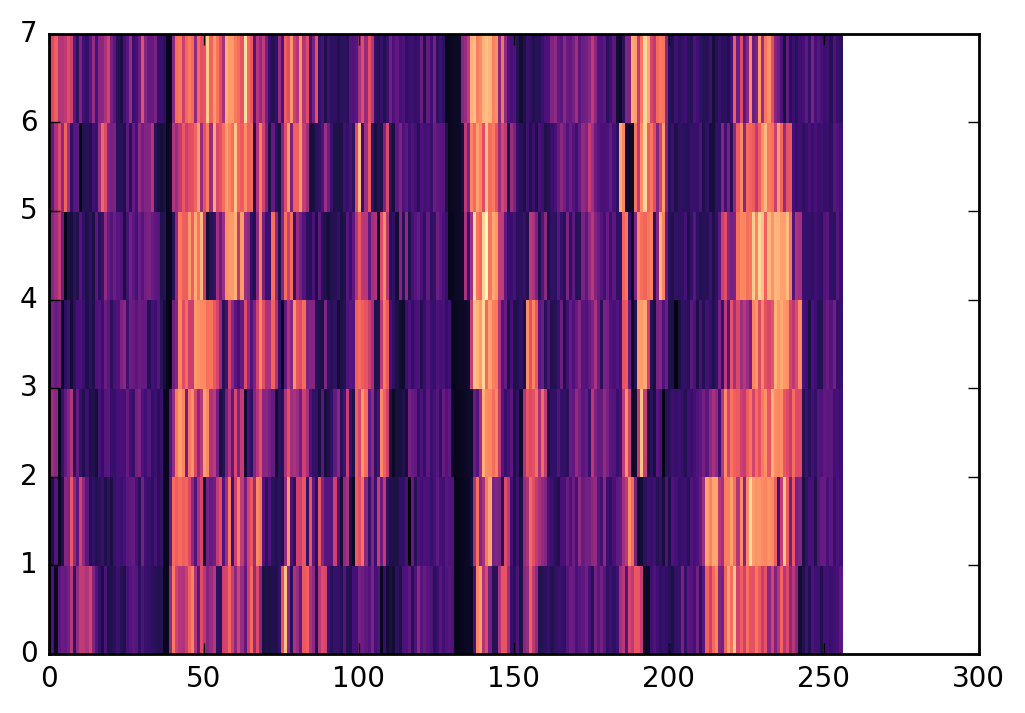

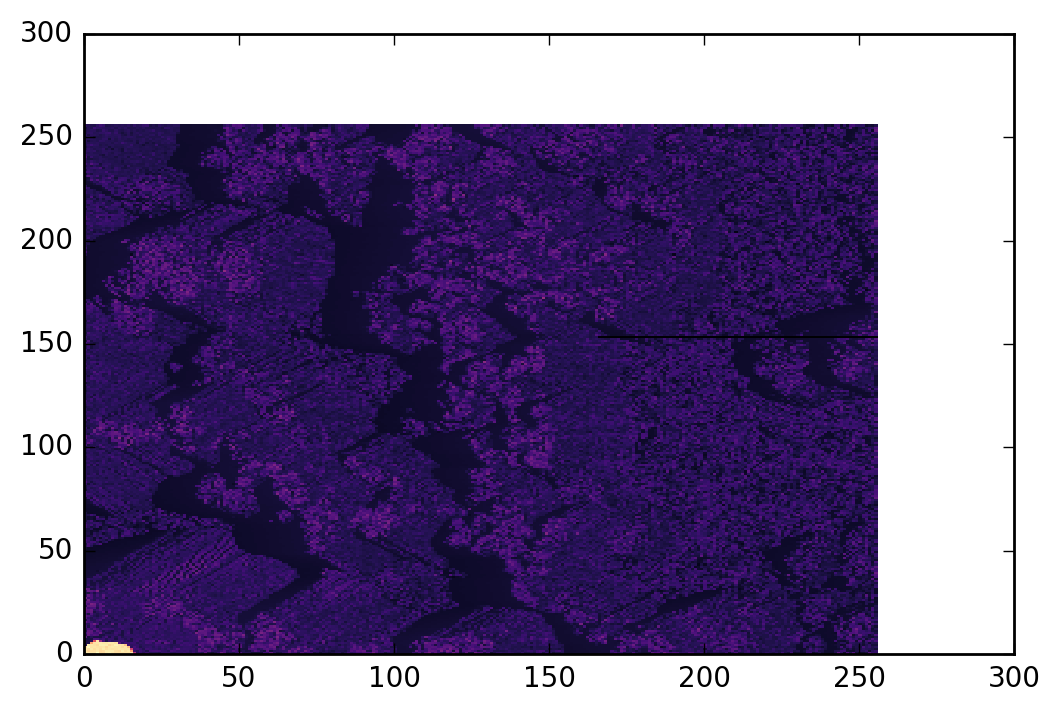

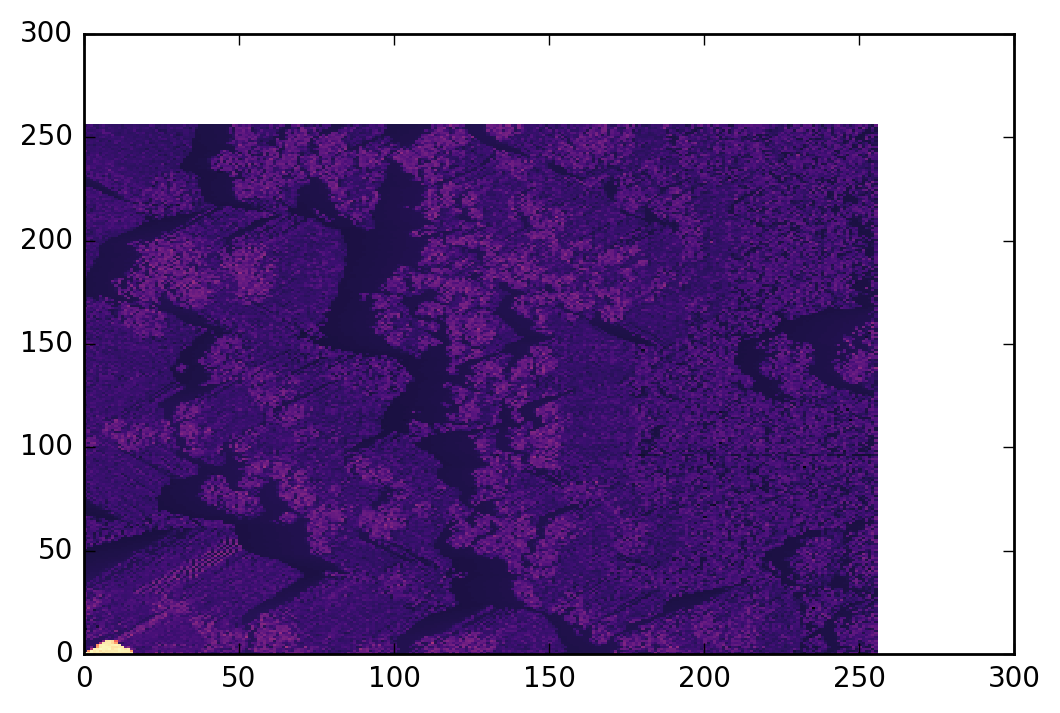

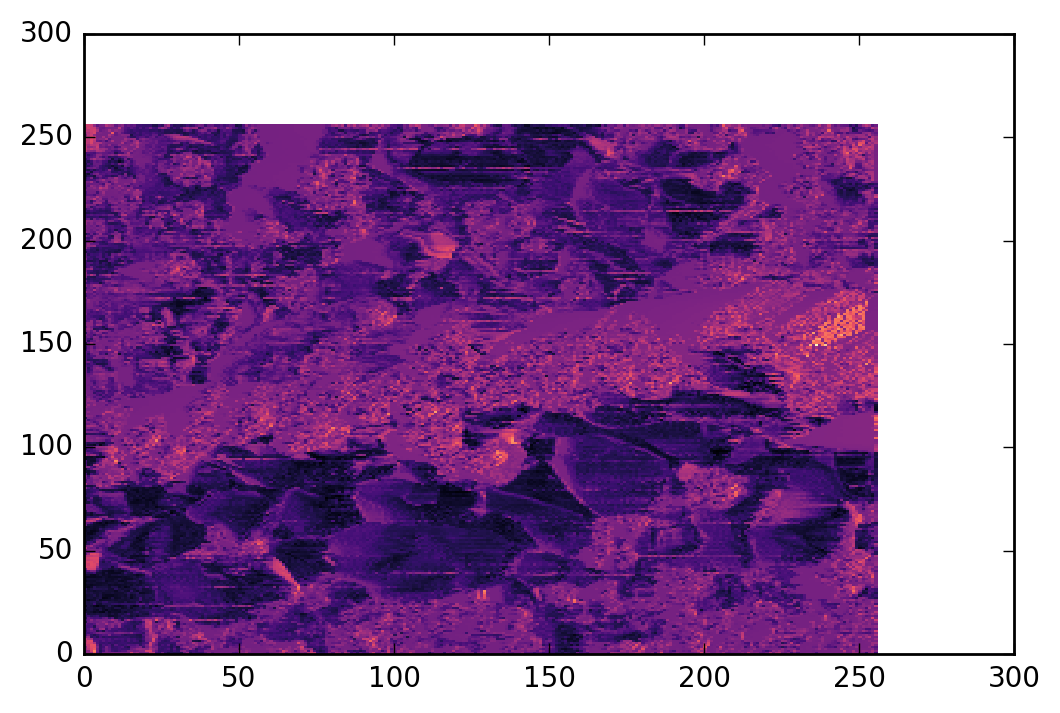

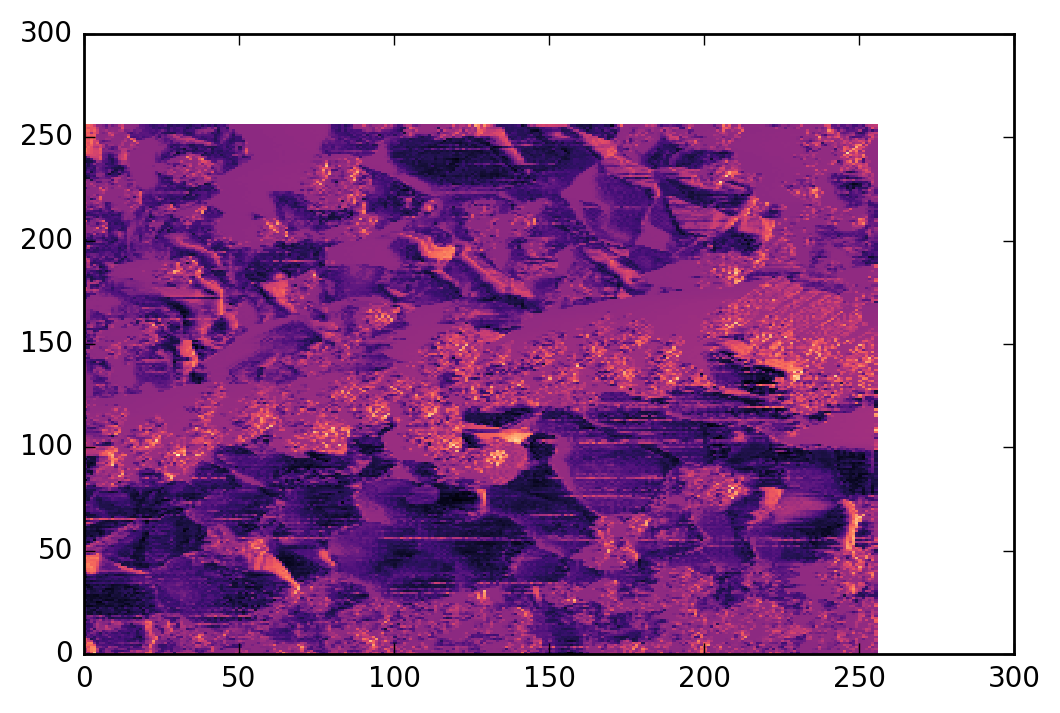

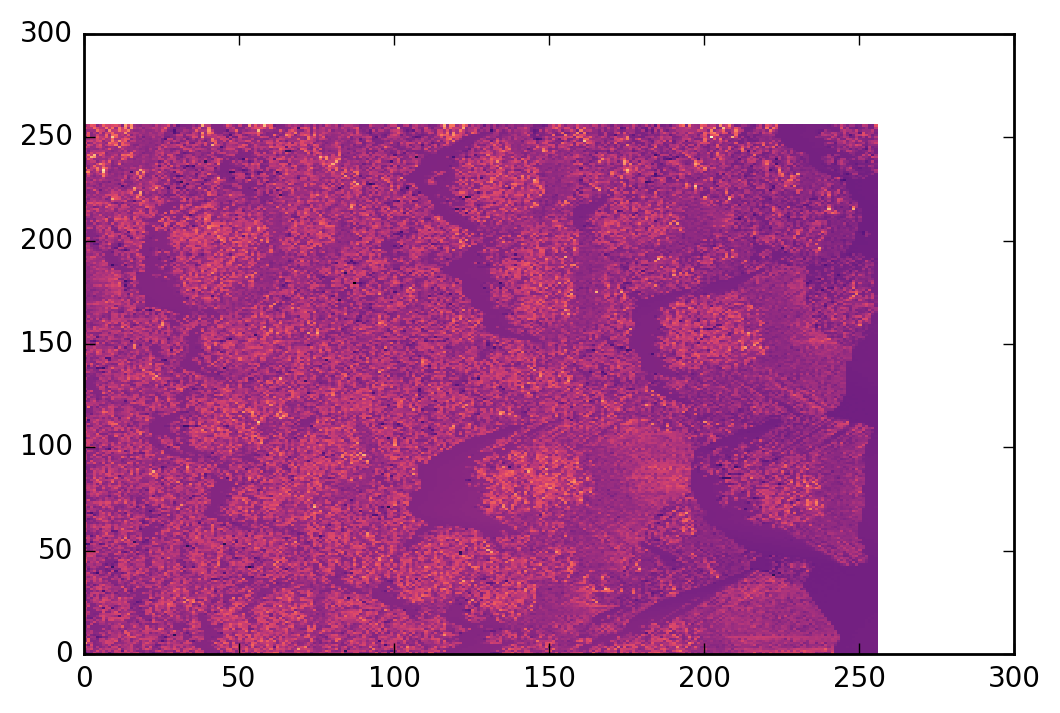

In [47]:
%config InlineBackend.figure_format = 'retina'
list(
    compose(plt.pcolor, do(lambda x: plt.figure(i)))(A) 
    for i, A in enumerate(DF['Phase'].raw_data.tolist())
)

In [8]:
import pandas as pd
from pandas import np
from toolz.curried.operator import *
from toolz.curried import *

In [10]:
τ = 10

In [15]:
add2 = add(2)

In [19]:
add2(20)

22

In [24]:
import pandas as pd

In [28]:
raw.images

{'AmplitudeError': <nanoscope.image.NanoscopeImage at 0x110001080>,
 'Height': <nanoscope.image.NanoscopeImage at 0x110001860>,
 'Phase': <nanoscope.image.NanoscopeImage at 0x1100018d0>}

In [ ]:
pd.DataFrame

In [33]:
phase = raw.images['Phase']

In [39]:
objs = pipe(
    phase,
    vars,
    keyfilter(complement(
        lambda s: str.startswith(s, '_')
    ))
)

In [43]:
raw

{'AmplitudeError': <nanoscope.image.NanoscopeImage at 0x110001080>,
 'Height': <nanoscope.image.NanoscopeImage at 0x110001860>,
 'Phase': <nanoscope.image.NanoscopeImage at 0x1100018d0>}

In [42]:
pipe(
    objs,
    valfilter(
        lambda s: hasattr(s, 'shape')
    ),
    valmap(attrgetter('shape'))
)

{'converted_data': (512, 512), 'flat_data': (512, 512), 'raw_data': (512, 512)}

In [31]:
pd.concat({
    key: pipe(
        value, vars, keyfilter(complement(
            lambda s: s.startswith('_')
        )), pd.DataFrame
    )
    for key, value in dict.items(raw.images)
})

ValueError: If using all scalar values, you must pass an index

In [27]:
list(
    pipe(
        img, 
         vars,
         keyfilter(complement(
             lambda s: s.startswith('_')
         ))
) for img in raw.images.values()))

bytes_per_pixel                                     converted_data  \
0                2                                               None   
1                2                                               None   
2                2  [[-2.33046796417, -0.557693519592, -2.43805839...   

                                           flat_data  height_scale   magnify  \
0                                               None   2999.999089  0.020408   
1                                               None     27.999991  0.507154   
2  [[-2361.0, -565.0, -2470.0, -1136.0, 2101.0, 4...     20.454633  0.316202   

   offset                                           raw_data          scale  \
0     0.0  [[-74, 27, 114, 78, 94, 42, 7, -278, -42, 106,...  146997.746000   
1     0.0  [[14305, 14156, 15005, 15853, 16701, 17550, 17...      55.210036   
2     0.0  [[-2361, -565, -2470, -1136, 2101, 4565, 2098,...      64.688500   

   scan_area            type       unit  
0         25  AmplitudeError  mV nm / V  
1         25          Height         nm  
2         25           Phase        deg

In [6]:
dir(raw)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_config_fuzzy_key',
 '_get_sensitivity_value',
 '_handle_parameter',
 '_read_header',
 '_read_image_data',
 '_read_image_header',
 '_validate_version',
 'amplitude',
 'config',
 'encoding',
 'height',
 'image',
 'images',
 'phase',
 'supported_versions']

In [48]:
pixels=raw.phase.colorize()

NameError: name 'raw' is not defined

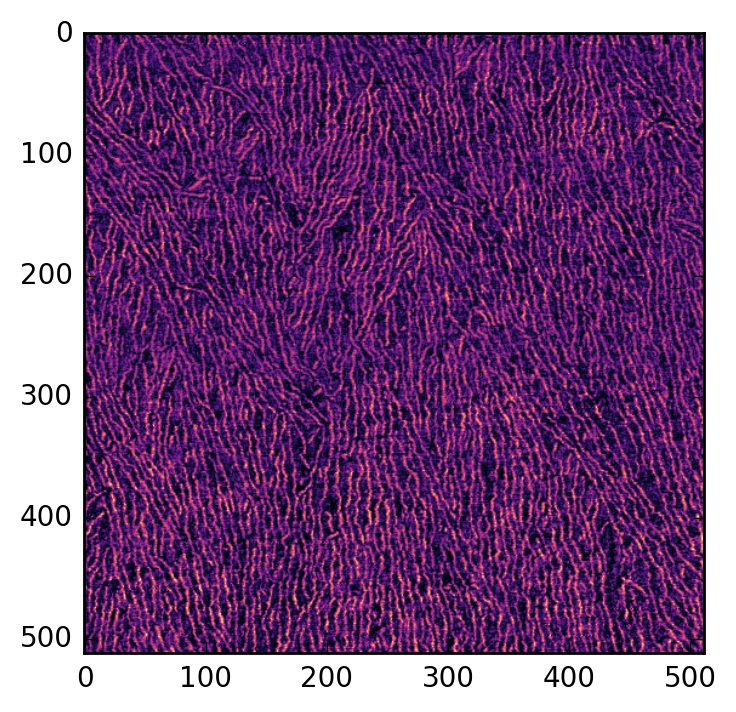

In [57]:
bailey_file='/Users/Imperssonator/CC/DeepAFM/Data/capture/Bailey/8_3_07a.001'
h_img = (Image.fromarray(nanoscope.read(bailey_file)
                             .phase
                             .process()
                             .flatten(order=3)
                             .colorize()
                        )
        ).convert('L')
%matplotlib inline
plt.imshow(h_img,cmap='magma')